In [1]:
Hongsuk Choi
304350259
03/19/2018

C:\Users\hong3\desktop\hw2


In [ ]:
cd C:\Users\hong3\desktop\hw2


In [2]:
import numpy as np
import pandas as pd

import matplotlib.image as mpimg
import matplotlib.pyplot as plt 

from os import listdir
from os.path import isfile, join

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

C:\Users\hong3\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
label_df = pd.read_csv('label.csv')
label_df.head()

,name of the file,digit
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4


In [4]:
label_df.shape

(1797, 2)

In [5]:
cd C:\Users\hong3\desktop\hw2\Digit

C:\Users\hong3\desktop\hw2\Digit


a- Download	the	dataset	“Digit”	from	CSNS.	Check	out	the	dataset.	It	includes	1797	small	
images	(8x8	pixels),	each	one	includes	a	hand-written	digit	(0-9).	You	have	to	download	
the	corresponding	csv	 file	 that	includes	 the	labels	of	 the	images.	The	goal	is	 to	build	a	
Machine	Learning	Algorithm that	can	recognize	the	hand-written	digits.	
Import	the	following	two	libraries	to	work	with	images:
import	matplotlib.image	as	mpimg
import	matplotlib.pyplot	as	plt
you	can	use:	
mpimg.imread(file_name)			to	load	an	image,	and	
plt.imshow(image_name,	 cmap=plt.cm.gray_r,	 interpolation='nearest')	 to	 show	 an	
image.	Add			%matplotlib	inline			at	top	of	your	code	to	make	sure	that	the	images	will	be	shown	inside	the	Jupyter	explorer	page.

In [6]:
a = mpimg.imread('0.jpg')

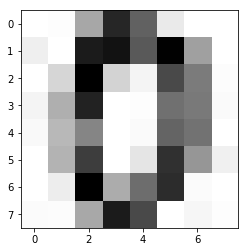

In [7]:
%matplotlib inline
plt.imshow(a , cmap=plt.cm.gray_r, interpolation='nearest')

b- Build	the	feature	matrix	and	label	vector: Each	image	is	considered	as	a	data	sample	with	
pixels	as	features.	Thus,	to	build	the	feature	table	you	have	to	convert	each	8x8	image	
into	a	row	of	the	feature	matrix	with	64	feature	columns	for	64	pixels.	

In [8]:
mypath = "C:\Users\hong3\desktop\hw2\Digit"

In [9]:
onlyfiles = [ f for f in listdir(mypath) if isfile(join(mypath,f)) ]

In [10]:
onlyfiles.sort(key=lambda f: int(filter(str.isdigit, f)))

In [11]:
images = np.empty(len(onlyfiles), dtype=object)

In [12]:
for i in range(0, len(onlyfiles)):
    images[i] = mpimg.imread( join(mypath,onlyfiles[i]) )
    images[i] = images[i].ravel()

In [13]:
images = pd.DataFrame(images, columns = ['name'])

In [14]:
images_df = pd.DataFrame()

In [15]:
for i in range(1797):
    k =  pd.DataFrame(images["name"][1796-i]).T
    images_df = k.append(images_df)

In [16]:
images_df = images_df.reset_index()

In [17]:
master_df = pd.concat([label_df, images_df], axis =1)

In [18]:
master_df.head(6)

,name of the file,digit,index,0,1,2,3,4,5,6,...,54,55,56,57,58,59,60,61,62,63
0,0,0,0,0,2,88,217,158,21,0,...,4,0,4,3,87,228,182,0,9,2
1,1,1,0,0,0,11,187,210,78,5,...,0,0,0,0,0,172,251,157,0,12
2,2,2,0,0,0,5,59,240,199,2,...,92,0,0,11,0,54,173,255,138,0
3,3,3,0,6,0,108,255,213,13,10,...,168,1,0,0,118,217,226,159,0,3
4,4,4,0,0,6,0,34,160,7,7,...,7,0,0,0,2,42,250,51,0,4
5,5,5,0,15,0,200,149,2,0,13,...,69,0,7,0,143,255,255,150,7,0


c- Use	sklearn	functions	to	split	the	dataset	into	testing	and	training	sets	with	the	following 
parameters:	test_size=0.1,	random_state=2.	

In [19]:
X = master_df.iloc[:,4:67]
Y = master_df["digit"]

In [20]:
print X.shape
print Y.shape

(1797, 63)
(1797L,)


In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

d- Design and Train an ANN with one hidden layer with 80 neurons to recognize the digits based on the training dataset that you built in part (c). Use random_state=1, learning_rate_init = 0.002. Then, Test your ANN on testing set (from part(c)), and calculate and report the accuracy. Also, calculate and report the Confusion Matrix. 

In [22]:
from sklearn import metrics
from sklearn.neural_network import MLPClassifier

ANN = MLPClassifier(hidden_layer_sizes=(80,), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.002)

ANN.fit(X_train, Y_train)
Y_predict_ann = ANN.predict(X_test)
score_ANN = accuracy_score(Y_test, Y_predict_ann)

print('Accuracy score:',score_ANN)


('Accuracy score:', 0.92777777777777781)


In [23]:
CM_ANN = metrics.confusion_matrix(Y_test, Y_predict_ann)

print("Confusion matrix:")
print(CM_ANN)

Confusion matrix:
[[13  0  0  0  1  0  0  0  0  0]
 [ 0 20  1  0  0  0  0  0  0  1]
 [ 0  0 14  0  0  0  0  0  0  0]
 [ 0  0  0 22  0  0  0  0  0  0]
 [ 0  0  0  0 16  0  0  1  3  1]
 [ 0  0  0  0  0 16  0  0  0  0]
 [ 0  1  0  0  0  0 17  0  0  0]
 [ 0  0  0  0  0  0  0 17  1  0]
 [ 0  1  0  0  0  0  0  0 18  0]
 [ 0  0  0  0  0  0  0  0  2 14]]


e- Now, use GridSearchCV to find the best number of neurons for your 1-hidden layer network. Search in the range of 50-200 neurons, and use the following parameters for your NN: activation='logistic', solver='adam', alpha=1e-5, random_state=1, learning_rate_init = 0.002.   What is the best accuracy, and best number of neurons? 

In [24]:
from sklearn.model_selection import GridSearchCV

neuron_number = [(i,) for i in range(50,200)]

my_grid = dict(hidden_layer_sizes = neuron_number)
print(my_grid,'\n')



({'hidden_layer_sizes': [(50,), (51,), (52,), (53,), (54,), (55,), (56,), (57,), (58,), (59,), (60,), (61,), (62,), (63,), (64,), (65,), (66,), (67,), (68,), (69,), (70,), (71,), (72,), (73,), (74,), (75,), (76,), (77,), (78,), (79,), (80,), (81,), (82,), (83,), (84,), (85,), (86,), (87,), (88,), (89,), (90,), (91,), (92,), (93,), (94,), (95,), (96,), (97,), (98,), (99,), (100,), (101,), (102,), (103,), (104,), (105,), (106,), (107,), (108,), (109,), (110,), (111,), (112,), (113,), (114,), (115,), (116,), (117,), (118,), (119,), (120,), (121,), (122,), (123,), (124,), (125,), (126,), (127,), (128,), (129,), (130,), (131,), (132,), (133,), (134,), (135,), (136,), (137,), (138,), (139,), (140,), (141,), (142,), (143,), (144,), (145,), (146,), (147,), (148,), (149,), (150,), (151,), (152,), (153,), (154,), (155,), (156,), (157,), (158,), (159,), (160,), (161,), (162,), (163,), (164,), (165,), (166,), (167,), (168,), (169,), (170,), (171,), (172,), (173,), (174,), (175,), (176,), (177,), (

In [ ]:
ANN = MLPClassifier(activation='logistic', solver='adam', 
                                         alpha=1e-5, random_state=1, 
                                           learning_rate_init = 0.002)

grid = GridSearchCV(ANN, my_grid, cv=10, scoring='accuracy')

grid.fit(X, Y)

print('grid.best_score_:',grid.best_score_)
print('graid.best_params_:',grid.best_params_)